In [1]:
# Insert code here.
import pandas as pd

### 数据读取

In [5]:
# nrows 表示 读取行数
train_df = pd.read_csv('./train_set.csv/train_set.csv', sep='\t')
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [36]:
train_df['text'][0]

'2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 4811 1292 2109 6905 5520 7058 6045 3634 6591 3530 6508 2465 7044 1519 3659 2073 3750 3731 4109 3792 6831 2614 3370 4269 3370 486 5770 4109 4125 3750 5445 2466 6831 6758 3743 3630 1726 2313 5906 826 4516 657 900 1871 7044 3750 2967 3731 1757 1939 648 2828 4704 7039 3706 3750 965 2490 7399 3743 2145 2407 7451 3775 6017 5998 1641 299 4704 2621 7029 3056 6333 433 648 1667 1099 900 2289 1099 648 5780 220 7044 1279 7426 4269 3750 2967 6758 6631 3099 2205 7305 2620 5977 3750 3329 1793 6666 2042 3193 4149 1519 7039 3706 2446 5399 648 4124 2058 3912 248 3193 2252 5649 2212 4939 7239 3310 4525 2400 900 5770 4109 4125 7044 4921 265 1397 4699 1699 669 6407 3750 1271 1271 4741 669 4659 3870 4030 4167 5338 25 3466 6909 4417 1859 3750 1465 7194 648 3938 1571 848 6986 827 2124 3750 1991 7444 7037 2729 908 6308 3750 1889 6810 4190 591 5598 2289 2109 6831 6407 2400 5410 517 900 25 3731 4109 3792 4128 1679 4811 

In [6]:
train_df['text']

0         2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1         4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2         7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3         7159 948 4866 2109 5520 2490 211 3956 5520 549...
4         3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
                                ...                        
199995    307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996    3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997    6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998    6405 3203 6644 983 794 1913 1678 5736 1397 191...
199999    4350 3878 3268 1699 6909 5505 2376 2465 6088 2...
Name: text, Length: 200000, dtype: object

### 数据分析

#### 新闻文本长度分析

In [7]:
train_df['text_len'] = train_df['text'].apply(lambda x : len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of char count')

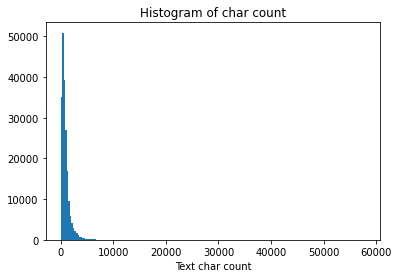

In [9]:
# bins表示总共有几条条状图
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

#### 新闻类别分布分析

Text(0.5, 0, 'category')

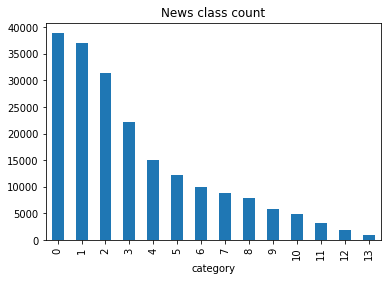

In [10]:
# value_counts 返回每个值出现的次数
# kind 表示数据的展示方式，bar表示柱状图
# type(train_df['label'].value_counts()) 为 pandas.core.series.Series
train_df['label'].value_counts().plot(kind = 'bar')
plt.title('News class count')
plt.xlabel('category')

{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

#### 字符分布统计

In [11]:
import numpy as np

In [12]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))
# 6869

print(word_count[0])
# ('3750', 7482224)

print(word_count[-1])
# ('3133', 1)

6869
('3750', 7482224)
('3133', 1)


In [13]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
# ('3750', 197997)

print(word_count[1])
# ('900', 197653)

print(word_count[2])
# ('648', 191975)

('3750', 197997)
('900', 197653)
('648', 191975)


### 本章作业

１　假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [14]:
import re

In [15]:
train_df['sentes_pre_news'] = train_df['text'].apply(lambda x : len(re.split('3750 |900 |648',x)))
print(train_df['sentes_pre_news'].describe())

count    200000.000000
mean         80.377085
std          86.948604
min           1.000000
25%          28.000000
50%          57.000000
75%         103.000000
max        3459.000000
Name: sentes_pre_news, dtype: float64


因此　每篇新闻平均有８０个句子

２　统计每类新闻中出现次数对多的字符

In [39]:
from pandas import Series, DataFrame

In [23]:
# 获取到所有标签
labellist = Counter(train_df['label']).keys()

In [22]:
def get_index1(lst=None, item=''):
    return [index for (index,value) in enumerate(lst) if value == item]

In [43]:
for label in labellist:
    rowlist = get_index1(train_df['label'],label)
    word_list = []
    for row in rowlist:
        word_list.extend(train_df['text'][row].split(' '))
    ser = Series(word_list)
    ser.value_counts()
    print('label:',label,' ','出现次数最多的字符:',ser.value_counts()[0])

label: 2   出现次数最多的字符: 1458331
label: 11   出现次数最多的字符: 83834
label: 3   出现次数最多的字符: 774668
label: 9   出现次数最多的字符: 178783
label: 10   出现次数最多的字符: 180259
label: 12   出现次数最多的字符: 87412
label: 0   出现次数最多的字符: 1267331
label: 7   出现次数最多的字符: 428638
label: 4   出现次数最多的字符: 360839
label: 1   出现次数最多的字符: 1200686
label: 6   出现次数最多的字符: 469540
label: 5   出现次数最多的字符: 715740
label: 8   出现次数最多的字符: 242367
label: 13   出现次数最多的字符: 33796
